In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from IPython.core.display_functions import display
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from pyclustering.cluster.clarans import clarans
from sklearn.decomposition import PCA
import warnings
import time

warnings.filterwarnings('ignore')

# # Adjusting for Data Frame Output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [2]:
# Categorical feature need to change numeric
# Encoder
def object_encoder(dataframe, encoder, target_feature):
    if encoder == "LabelEncoder" or encoder == "LabelEncoder()":
        encoder = LabelEncoder()
        dataframe[target_feature] = encoder.fit_transform(dataframe[target_feature])
    elif encoder == "OrdinalEncoder" or encoder == "OrdinalEncoder()":
        encoder = LabelEncoder()
        dataframe[target_feature] = encoder.fit_transform(dataframe[target_feature])
    elif encoder is None:
        return dataframe
    else:
        return None

    return dataframe

In [3]:
# Scaling
def data_scaling(dataframe, scaling):
    if scaling == "StandardScaler" or scaling == "StandardScaler()":
        scaling = StandardScaler()
    elif scaling == "MinMaxScaler" or scaling == "MinMaxScaler()":
        scaling = MinMaxScaler()
    elif scaling == "MaxAbsScaler" or scaling == "MaxAbsScaler()":
        scaling = MaxAbsScaler()
    elif scaling == "RobustScaler" or scaling == "RobustScaler()":
        scaling = RobustScaler()
    elif scaling == "Normalizer" or scaling == "Normalizer()":
        scaling = Normalizer()
    elif scaling is None:
        return dataframe
    else:
        return None

    dataframe = pd.DataFrame(scaling.fit_transform(dataframe), columns=dataframe.columns)
    return dataframe

In [4]:
# K-means
def model_kmeans(dataset, clusters=None, n_inits=None):
    start = time.process_time()
    time.sleep(1)
    pca = PCA(n_components=2)  # Reduce feature for plotting
    dataset = pd.DataFrame(pca.fit_transform(dataset))
    if clusters is None:
        clusters = [2, 4, 6, 8]  # count of clustering
    if n_inits is None:
        n_inits = [10, 20, 30]
    init_list = ["auto", "full", "elkan"]  # algorithm list

    row_count = len(clusters)
    col_count = len(n_inits) * 3
    f, axes = plt.subplots(row_count, col_count)
    f.suptitle("K-means")
    f.tight_layout()
    f.set_size_inches((20, len(clusters) * 5))  # Set grid size
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Set grid margins

    for number_k, k in enumerate(clusters):
        for number_inits, init in enumerate(n_inits):
            for number_init, select_init in enumerate(init_list):
                kmeans = KMeans(n_clusters=k, n_init=init, algorithm=select_init, random_state=42).fit(dataset)
                labels = kmeans.predict(dataset)
                axes[number_k, number_inits + number_init].set_title(
                    "K-means [cluster = " + str(k) + ", n_init = " + str(init)
                        + ", algorithm = " + str(select_init) + "]")
                for i in range(len(labels)):
                    axes[number_k, number_inits + number_init].scatter(x=dataset.iloc[:, 0], y=dataset.iloc[:, 1],
                                                                       c=labels)

    print("K-mean running time: ",time.process_time()-start,"sec")
    return plt

In [5]:
# EM(GMM)
def model_gaussian(dataset, clusters=None):
    start = time.process_time()
    time.sleep(1)
    pca = PCA(n_components=2)  # Reduce feature for plotting
    dataset = pd.DataFrame(pca.fit_transform(dataset))
    if clusters is None:
        clusters = [2, 4, 6, 8]
    covariance_type = ['full', 'tied', 'diag', 'spherical']
    init_params = ['kmeans', 'random']

    row_count = len(clusters)
    col_count = 6
    f, axes = plt.subplots(row_count, col_count)
    f.suptitle("EM (GMM)")
    f.tight_layout()
    f.set_size_inches((10, len(clusters) * 5))  # Set grid size
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Set grid margins

    for num_type, type in enumerate(covariance_type):
        for num_par, par in enumerate(init_params):
            for number_k, k in enumerate(clusters):
                gmm = GaussianMixture(n_components=k, covariance_type=type, init_params=num_par).fit(dataset)
                labels = gmm.predict(dataset)
                axes[number_k][2].set_title("K-means [cluster = " + str(k) + "]")
                for i in range(0, k):
                    axes[number_k].scatter(x=dataset.iloc[:, 0], y=dataset.iloc[:, 1], c=labels)

    print("EM running time: ",time.process_time()-start,"sec")
    return plt

In [ ]:
def model_clarans(dataset, clusters=None):
    start = time.process_time()
    time.sleep(1)
    pca = PCA(n_components=2)  # Reduce feature for plotting
    dataset = pd.DataFrame(pca.fit_transform(dataset))
    if clusters is None:
        clusters = [2, 4, 6, 8]
    # Parameters
    tuple_data = dataset.values.tolist()
    numlocal = 2
    maxneighbor = 3

    row_count = len(clusters)
    col_count = 1
    f, axes = plt.subplots(row_count, col_count)
    f.suptitle("CLARANS")
    f.tight_layout()
    f.set_size_inches((10, len(clusters) * 5))  # Set grid size
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Set grid margins

    for number_k, k in enumerate(clusters):
        clarans_obj = clarans(tuple_data, number_clusters=k, numlocal=numlocal, maxneighbor=maxneighbor)


    print("EM running time: ",time.process_time()-start,"sec")
    return plt

In [6]:
# read Dataset
df_origin = pd.read_csv('dataset/housing.csv')

In [7]:
# Check data information
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df_origin.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Copy dataset
df = df_origin.copy()

# Drop null data
df.dropna(axis=0, inplace=True)

display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# testing
df = object_encoder(df, 'OrdinalEncoder', "ocean_proximity")
df = data_scaling(df, "StandardScaler")

x = df.drop(columns=["median_house_value"])

display(x)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,1.291351
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.291351
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.291351
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.291351
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.291351
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.117001
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-0.117001
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.117001
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.117001


<AxesSubplot: >

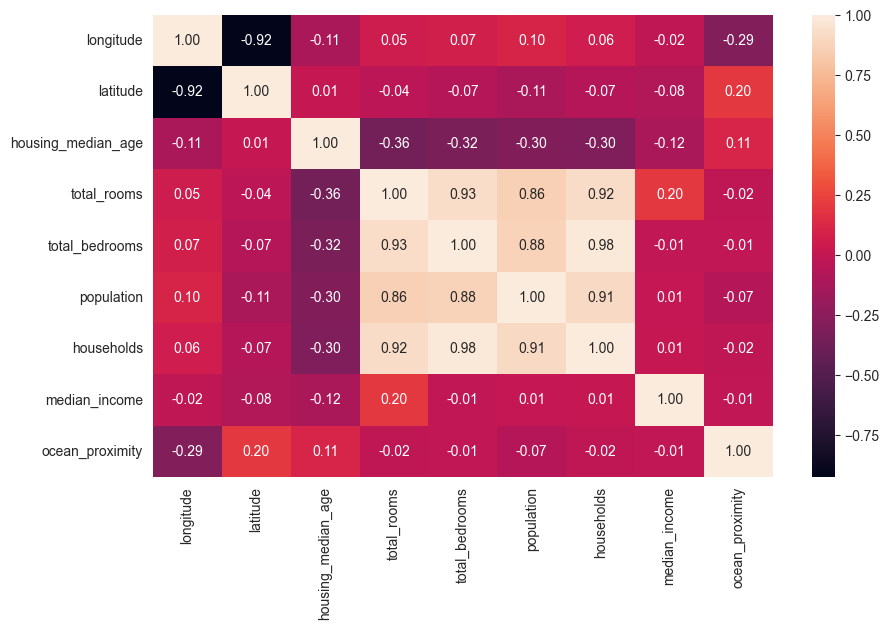

In [11]:
# Check the correlation of dataset between target and features
plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True, fmt='0.2f')

In [12]:
column = ['total_rooms', 'total_bedrooms', 'population', 'households']
a = x.loc[:, column]
a = a.sample(n = int(a.shape[0] * 0.3))
display(a)

,total_rooms,total_bedrooms,population,households
12587,-0.294023,-0.452971,-0.567383,-0.377811
14353,0.729674,0.451212,0.533942,0.576961
15655,-0.240939,-0.199040,-0.537378,-0.160699
10992,-0.690780,-0.837427,-0.738582,-0.832963
11456,-0.226753,0.140325,0.541002,0.223826
...,...,...,...,...
14312,-0.099077,-0.348551,-0.448249,-0.281026
20163,-0.671103,-0.925235,-0.822417,-0.934980
3923,0.045989,0.783458,1.322872,0.746990
17812,-0.540681,-0.398388,-0.609741,-0.440591


In [14]:
data = model_kmeans(a)
data.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x127b5e560> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x147daadd0> (for post_execute):



KeyboardInterrupt

